In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
mpl.rcParams['font.size'] = 8
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams["font.family"] = "serif"
csfont = {'fontname':'Times New Roman'}
plt.rcParams['mathtext.fontset']='dejavuserif'

In [3]:
input_data_path = "/Users/jeager/Documents/PhD_work/ekman_ocean/input_data/ProCb"
output_data_path = "/Users/jeager/Documents/PhD_work/ekman_ocean/output_data/ProCb"
plot_path = "/Users/jeager/Documents/PhD_work/ekman_ocean/plots"

In [4]:
lats_file = "lats.dat"
lons_file = "lons.dat"

lw_net_down_file = "surface_net_downward_longwave_flux.dat"
sw_net_down_file = "surface_net_downward_shortwave_flux.dat"
latent_up_file = "surface_upward_latent_heat_flux.dat"
sensible_up_file = "surface_upward_sensible_heat_flux.dat"

In [5]:
os.chdir(input_data_path)
lats_index = np.loadtxt(lats_file, dtype=int, delimiter="\t",usecols=[0])
lats_data = np.loadtxt(lats_file, delimiter="\t",usecols=[1])
lons_index = np.loadtxt(lons_file, dtype=int, delimiter="\t",usecols=[0])
lons_data = np.loadtxt(lons_file, delimiter="\t",usecols=[1])

lw_net_down_data = np.loadtxt(lw_net_down_file, delimiter="\t",usecols=lons_index)
sw_net_down_data = np.loadtxt(sw_net_down_file, delimiter="\t",usecols=lons_index)
latent_up_data = np.loadtxt(latent_up_file, delimiter="\t",usecols=lons_index)
sensible_up_data = np.loadtxt(sensible_up_file, delimiter="\t",usecols=lons_index)
upward_Q_flux_init = latent_up_data+sensible_up_data-(lw_net_down_data+sw_net_down_data)

In [15]:
os.chdir(output_data_path)
up_surf_Q_flux_final_file = "upward_surface_Q_flux_20000_days.dat"
up_surf_Q_flux_final = np.loadtxt(up_surf_Q_flux_final_file, delimiter="\t",usecols=lons_index)

-0.45741132686673325
-1.0551871883765997


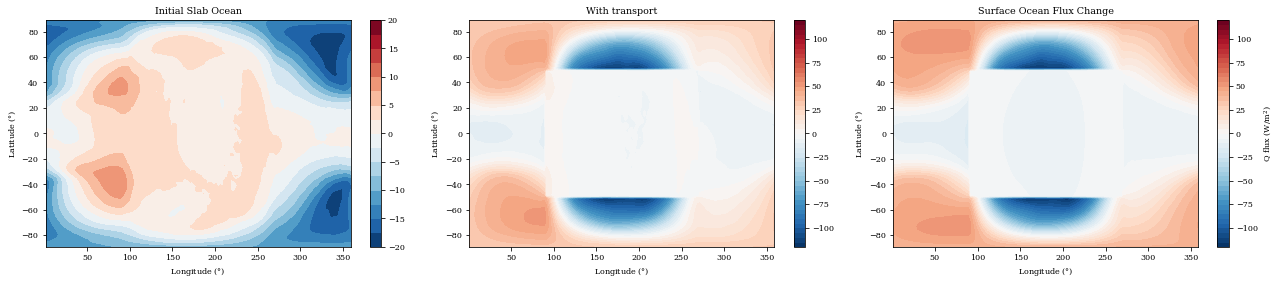

In [19]:
fig = plt.figure(figsize=(18,4))
ax = plt.subplot(1,3,1)

c_levels = np.arange(-20,21,2.5)
cntr = ax.contourf(lons_data,lats_data,upward_Q_flux_init,
    levels=c_levels,
    cmap=plt.cm.RdBu_r,
    )
ax.set_ylabel(r'Latitude ($\degree$)')
ax.set_xlabel(r'Longitude ($\degree$)')
ax.set_title("Initial Slab Ocean")
cbar = fig.colorbar(cntr)
#cbar.set_label('Temperature (K)')

av_Q_flux = np.average(upward_Q_flux_init,axis=0,weights=np.cos(np.pi/180.*lats_data))
av_Q_flux = np.mean(av_Q_flux,axis=0)
print(av_Q_flux)

ax = plt.subplot(1,3,2)

c_levels = np.arange(-120,121,5)
cntr = ax.contourf(lons_data,lats_data,up_surf_Q_flux_final,
    levels=c_levels,
    cmap=plt.cm.RdBu_r,
    )
ax.set_ylabel(r'Latitude ($\degree$)')
ax.set_xlabel(r'Longitude ($\degree$)')
ax.set_title("With transport")
cbar = fig.colorbar(cntr)
#cbar.set_label('Temperature (K)')

av_Q_flux = np.average(up_surf_Q_flux_final,axis=0,weights=np.cos(np.pi/180.*lats_data))
av_Q_flux = np.mean(av_Q_flux,axis=0)
print(av_Q_flux)

ax = plt.subplot(1,3,3)

diff = up_surf_Q_flux_final - upward_Q_flux_init
# c_levels = np.arange(-20.,21.,2.5)
# c_levels = np.arange(190.,331.,5)
cntr = ax.contourf(lons_data,lats_data,diff,
    levels=c_levels,
    cmap=plt.cm.RdBu_r
    )
ax.set_ylabel(r'Latitude ($\degree$)')
ax.set_xlabel(r'Longitude ($\degree$)')
ax.set_title("Surface Ocean Flux Change")
cbar = fig.colorbar(cntr)
cbar.set_label(r'Q flux (W/m$^2$)')

plt.tight_layout()
plt.show()
os.chdir(plot_path)
fig.savefig('up_lw_flux_maps.pdf')
